로컬 파일 './resnet50_imagenet_quantized.tflite'에서 TFLite 모델 로드 중...
TFLite 모델 로드 및 텐서 할당 완료.
TFLite 입력 텐서 정보: [{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
TFLite 출력 텐서 정보: [{'name': 'StatefulPartitionedCall_1:0', 'index': 294, 'shape': array([   1, 1000], dtype=int32), 'shape_signature': array([  -1, 1000], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
예상 입력 형태: [  1 224 224   3], 데이터 타입: <class 'numpy.float32'>
예상 출력 데이터 타입: <class 'numpy.float32'>
경고: 'imagenet_classes.t

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/home/xilinx/jupyter_notebooks/pynq-dpu/.tflite_env/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/xilinx/jupyter_notebooks/pynq-dpu/.tflite_env/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)



Classification Results:
- nematode: 0.1191
- cleaver: 0.0349
- ballpoint: 0.0279
- oboe: 0.0277
- nail: 0.0267


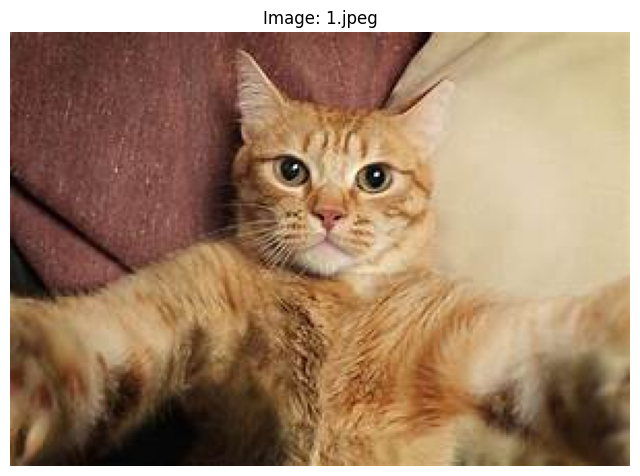

Processed image: 1.jpeg, Top 1 Prediction: nematode (Score: 0.1191)

--- 101개 이미지 전체 PS (CPU) TFLite 추론 성능 측정 ---
Processed image: 1.jpeg, Top 1 Prediction: nematode (Score: 0.1191)
Processed image: 10.jpeg, Top 1 Prediction: nematode (Score: 0.1345)
Processed image: 14.jpeg, Top 1 Prediction: nematode (Score: 0.1133)
Processed image: 16.jpeg, Top 1 Prediction: nematode (Score: 0.1232)
Processed image: 17.jpeg, Top 1 Prediction: nematode (Score: 0.1149)
Processed image: 19.jpeg, Top 1 Prediction: nematode (Score: 0.1019)
Processed image: 2.jpeg, Top 1 Prediction: nematode (Score: 0.1146)
Processed image: 4.jpeg, Top 1 Prediction: nematode (Score: 0.1227)
Processed image: 5.jpeg, Top 1 Prediction: nematode (Score: 0.1021)
Processed image: 6.jpeg, Top 1 Prediction: nematode (Score: 0.1307)
Processed image: 76.jpeg, Top 1 Prediction: nematode (Score: 0.0918)
Processed image: 77.jpeg, Top 1 Prediction: nematode (Score: 0.0555)
Processed image: 78.jpeg, Top 1 Prediction: nematode (Score: 0.

Processed image: OIP-1DmKK0drohhyY2Ssem6AuQHaGJ.jpeg, Top 1 Prediction: nematode (Score: 0.1246)
Processed image: OIP-2QszCnoBnSJ_JEAftge-DgHaE8.jpeg, Top 1 Prediction: nematode (Score: 0.1353)
Processed image: OIP-2SxBWLq3JZHphB2xxkXI7QAAAA.jpeg, Top 1 Prediction: nematode (Score: 0.1209)
Processed image: OIP-2T1yupCVWmzn_mHjv6ohYQAAAA.jpeg, Top 1 Prediction: nematode (Score: 0.1415)
Processed image: OIP-2TINkS3ll-8tysV3MByFyAHaEy.jpeg, Top 1 Prediction: nematode (Score: 0.0679)
Processed image: OIP-2TJq1a5oDSMHM50S7F3E8wHaE6.jpeg, Top 1 Prediction: matchstick (Score: 0.0796)
Processed image: OIP-2US-P_A_FNsJWVQ2JyleCAHaE8.jpeg, Top 1 Prediction: nematode (Score: 0.1247)
Processed image: OIP-2UhoxAp1zf5nB64TKmtZKQAAAA.jpeg, Top 1 Prediction: nematode (Score: 0.0530)
Processed image: OIP-2Z5nlZgwG9U7KQlYiPGj5gHaJA.jpeg, Top 1 Prediction: nematode (Score: 0.1150)
Processed image: OIP-2__NpI2rLlo-FYlj7h-fNwHaE7.jpeg, Top 1 Prediction: nematode (Score: 0.1324)
Processed image: OIP-2cHYMnL

In [1]:
#!/usr/bin/env python
# coding: utf-8

# # PS (CPU) Only example: Resnet50 with TensorFlow Lite
# ----

# ## Aim/s
# * This notebook demonstrates running ResNet50 inference purely on the PYNQ Processing System (PS) CPU using a pre-converted TensorFlow Lite (TFLite) model.
# * It also measures the inference performance (FPS).

# ## 1. Prepare the environment
# We will download the overlay onto the board. 

# In[2]:


# 필요한 라이브러리 임포트
import os
import time
import numpy as np
import cv2 # 이미지 처리용
import matplotlib.pyplot as plt

# TFLite Interpreter를 직접 임포트합니다.
from tflite_runtime.interpreter import Interpreter

# Keras Applications의 유틸리티 함수(preprocess_input, decode_predictions)는
# tflite-runtime에 포함되어 있지 않으므로 임포트하지 않습니다.
# 대신 아래에서 직접 구현합니다.

# Jupyter Cell Magic은 .py 파일에서는 주석 처리하거나 제거합니다.
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except NameError:
    pass # 주피터 노트북 환경이 아니면 에러 무시


# In[3]:

# TensorFlow Lite 런타임만 설치했으므로 tf.__version__은 사용할 수 없습니다.
# 이 셀은 출력할 내용이 없으므로 주석 처리하거나 삭제합니다.
# print(f"TensorFlow Version: {tf.__version__}")


# ## 2. Load the TFLite Model
# We will load the .tflite model and prepare the interpreter.

# In[4]:


# 변환하여 PYNQ 보드에 업로드한 .tflite 모델 파일의 경로를 지정합니다.
# 파일 이름과 경로를 실제 업로드한 파일에 맞춰 변경해주세요.
tflite_model_path = "./resnet50_imagenet_quantized.tflite"
# 만약 양자화된 모델이라면 (예: resnet50_imagenet_quantized.tflite) 해당 파일명으로 변경

print(f"로컬 파일 '{tflite_model_path}'에서 TFLite 모델 로드 중...")
try:
    # TFLite Interpreter 로드
    interpreter = Interpreter(model_path=tflite_model_path)
    # 텐서 할당 (모델 로드 후 반드시 호출)
    interpreter.allocate_tensors()
    print("TFLite 모델 로드 및 텐서 할당 완료.")

    # 입력 및 출력 텐서의 세부 정보 가져오기
    # 모델의 입력/출력 형태(shape)와 데이터 타입(dtype)을 확인하는 것이 중요합니다.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    print(f"TFLite 입력 텐서 정보: {input_details}")
    print(f"TFLite 출력 텐서 정보: {output_details}")

    # 입력 텐서의 요구사항 (예: (1, 224, 224, 3) 및 dtype) 확인
    # ResNet50은 보통 (1, 224, 224, 3) 형태의 float32 입력을 가집니다.
    # 양자화 모델이라면 dtype이 int8 또는 uint8일 수 있습니다.
    input_shape = input_details[0]['shape']
    input_dtype = input_details[0]['dtype']
    output_dtype = output_details[0]['dtype']

    print(f"예상 입력 형태: {input_shape}, 데이터 타입: {input_dtype}")
    print(f"예상 출력 데이터 타입: {output_dtype}")

except Exception as e:
    print(f"오류: TFLite 모델 파일 로드에 실패했습니다. 파일 경로를 확인하거나 파일이 손상되지 않았는지 확인하세요.")
    print(f"에러 메시지: {e}")
    interpreter = None # 모델 로드 실패 시 interpreter를 None으로 설정하여 이후 추론 방지


# ## 3. Utility functions
# 
# In this section, we will prepare a few functions for later use. This includes custom
# pre-processing and post-processing functions since `tensorflow.keras` is not available.

# In[5]:

# ImageNet 클래스 ID와 이름 매핑 (decode_predictions 대체)
# 'imagenet_classes.txt' 파일을 사용하여 라벨을 로드합니다.
# 이 파일은 각 라인에 '클래스_번호, 클래스_이름' 형식을 가집니다.
IMAGENET_LABELS = {}
label_file_path = 'imagenet_classes.txt' # 사용자 지정 파일명

if os.path.exists(label_file_path):
    with open(label_file_path, 'r') as f:
        lines = f.readlines()
        # 파일의 첫 두 줄은 메타데이터이므로 건너뛰고 세 번째 줄부터 읽습니다.
        if len(lines) > 2:
            label_lines = lines[2:] # 인덱스 2부터 시작
        else:
            label_lines = lines # 파일이 짧은 경우 모든 라인 처리

        for line in label_lines:
            line = line.strip()
            if not line: continue # 빈 줄 건너뛰기

            parts = line.split(',', 1) # 첫 번째 콤마 기준으로 분할 (예: "0", "tench")
            if len(parts) == 2:
                try:
                    class_id = int(parts[0].strip())
                    class_name = parts[1].strip()
                    # ImageNet 'n' ID는 이 파일에 없으므로, 필요하면 'n' + 숫자 ID 형태로 생성합니다.
                    IMAGENET_LABELS[class_id] = ('n' + str(class_id).zfill(8), class_name)
                except ValueError:
                    print(f"경고: '{label_file_path}' 파일의 잘못된 형식 라인 (숫자 파싱 오류): {line}")
            else:
                print(f"경고: '{label_file_path}' 파일의 예상치 못한 형식 라인 (콤마 없음): {line}")

    print(f"'{label_file_path}'에서 {len(IMAGENET_LABELS)}개 라벨 로드 완료.")
else:
    print(f"경고: '{label_file_path}' 파일을 찾을 수 없습니다. 라벨 매핑이 불완전할 수 있습니다.")
    # 파일이 없을 경우 최소한의 하드코딩된 라벨을 사용합니다. 실제 사용 시에는 전체 라벨을 포함해야 합니다.
    IMAGENET_LABELS = {
        0: ('n01440764', 'tench'),
        1: ('n01443537', 'goldfish'),
        2: ('n01484850', 'great_white_shark'),
        281: ('n02391049', 'zebra'),
        339: ('n02883203', 'bobsled'),
        397: ('n04067472', 'remote_control'),
        999: ('n04596000', 'wooden_spoon'),
    }


# TFLite 모델의 입력에 맞게 이미지를 전처리하는 함수 (Keras preprocess_input 대체)
def preprocess_image_for_tflite(image_path, target_size=(224, 224), required_dtype=np.float32):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"이미지 파일을 찾을 수 없거나 로드할 수 없습니다: {image_path}")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV는 BGR을 기본으로 하므로 RGB로 변환
    img = cv2.resize(img, target_size)       # 모델 입력 크기에 맞게 리사이즈 (예: 224x224)
    img = np.expand_dims(img, axis=0)        # 배치 차원 추가 (예: (1, 224, 224, 3))

    # ResNet50의 표준 전처리 로직 (0-255 -> -1.0 ~ 1.0 범위로 정규화)
    # 대부분의 ImageNet pretrained 모델이 이 전처리를 사용합니다.
    img = (img / 127.5) - 1.0

    # TFLite 모델의 입력 텐서 데이터 타입에 맞게 최종 변환
    return img.astype(required_dtype)


# TFLite 모델의 출력을 후처리하는 함수 (Keras decode_predictions 대체)
def postprocess_output_from_tflite(predictions, top_k=5, output_details=None):
    # 만약 TFLite 모델의 출력이 양자화되어 있다면, 여기서 역양자화(dequantization)를 수행해야 합니다.
    if output_details and output_details[0]['dtype'] != np.float32:
        scale = output_details[0]['quantization']['scale']
        zero_point = output_details[0]['quantization']['zero_point']
        predictions = (predictions - zero_point) * scale
        predictions = predictions.astype(np.float32) # 확률 계산을 위해 float32로 변환

    # Softmax (TFLite 모델의 마지막 레이어에 Softmax가 포함되지 않은 경우 수동 적용)
    # 대부분의 TFLite 분류 모델은 Softmax를 마지막 레이어에 포함합니다.
    # 모델 변환 시 Softmax가 제거되었다면 이 부분을 활성화해야 합니다.
    # exp_preds = np.exp(predictions - np.max(predictions))
    # predictions = exp_preds / np.sum(exp_preds)

    # 확률 순으로 정렬하고 상위 K개 선택
    # predictions는 (1, 1000) 형태의 NumPy 배열이라고 가정합니다.
    class_probabilities = predictions[0] # 배치 차원 제거
    
    # 확률이 높은 순서대로 인덱스를 가져옵니다.
    top_indices = np.argsort(class_probabilities)[::-1][:top_k]
    
    results = []
    for i in top_indices:
        class_id_info = IMAGENET_LABELS.get(i, ('unknown', f'Unknown Class {i}')) # 라벨이 없으면 Unknown으로 표시
        label = class_id_info[1] # 클래스 이름 (예: 'tench')
        score = class_probabilities[i] # 해당 클래스의 확률
        results.append((label, score)) # (클래스 이름, 점수) 형식
        
    return results


# In[6]:


# 테스트 이미지가 있는 폴더 경로
image_folder = 'img_resnet' # 예시: PYNQ 노트북과 같은 위치의 img_resnet 폴더
# 지원하는 이미지 파일 확장자 필터링
original_images = sorted([i for i in os.listdir(image_folder)
                          if i.lower().endswith((".jpeg", ".jpg", ".png"))])
total_images = len(original_images)

print(f"'{image_folder}' 폴더에서 찾은 이미지 개수: {total_images}장")
if total_images == 0:
    print("경고: 이미지를 찾을 수 없습니다. 폴더 경로와 파일 확장자를 확인하세요.")


# ## 4. Run TFLite Inference (PS only)
# Now we can use the loaded TFLite model to do image classification on the PS.

# In[7]:


def run_tflite_inference(image_index, display=False):
    if interpreter is None:
        print("오류: TFLite Interpreter가 로드되지 않아 추론을 수행할 수 없습니다.")
        return None # 오류 시 None 반환

    if image_index >= total_images or image_index < 0:
        print(f"오류: 이미지 인덱스 {image_index}가 유효 범위를 벗어났습니다. (0 ~ {total_images-1})")
        return None

    image_file_path = os.path.join(image_folder, original_images[image_index])
    
    # 이미지 전처리 (TFLite 모델의 입력 요구사항에 맞게)
    try:
        # input_details[0]['dtype']를 전처리 함수에 전달하여 데이터 타입 일치
        preprocessed_image = preprocess_image_for_tflite(
            image_file_path,
            target_size=(input_shape[1], input_shape[2]), # 모델의 입력 해상도 사용
            required_dtype=input_dtype
        )
    except FileNotFoundError as e:
        print(f"전처리 오류: {e}")
        return None
    
    # TFLite Interpreter에 입력 텐서 설정
    interpreter.set_tensor(input_details[0]['index'], preprocessed_image)
    
    # TFLite 추론 실행
    interpreter.invoke()
    
    # 출력 텐서 결과 가져오기
    predictions = interpreter.get_tensor(output_details[0]['index'])
    
    # 출력 후처리 (TFLite 모델의 출력 요구사항 및 decode_predictions 대체 함수에 맞게)
    results = postprocess_output_from_tflite(predictions, top_k=5, output_details=output_details)
    
    if display:
        display_image = cv2.imread(image_file_path)
        if display_image is None:
            print(f"경고: 디스플레이를 위해 원본 이미지 {image_file_path}를 로드할 수 없습니다.")
        else:
            display_image = cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB)
            
            plt.figure(figsize=(8, 8))
            plt.imshow(display_image)
            plt.axis('off')
            plt.title(f"Image: {original_images[image_index]}")
            print("\nClassification Results:")
            for class_name, score in results:
                print(f"- {class_name}: {score:.4f}")
            plt.show()

    print(f"Processed image: {original_images[image_index]}, Top 1 Prediction: {results[0][0]} (Score: {results[0][1]:.4f})")
    return results # 결과 반환 (옵션)


# Let's run it for 1 image and print out the predicted label.

# In[8]:


if total_images > 0 and interpreter is not None:
    run_tflite_inference(0, display=True) # 첫 번째 이미지 (인덱스 0)로 테스트
else:
    print("테스트할 이미지가 없거나 TFLite 모델이 로드되지 않았습니다.")


# We can also run it for multiple images to measure performance.

# In[9]:


if total_images > 0 and interpreter is not None:
    print(f"\n--- {total_images}개 이미지 전체 PS (CPU) TFLite 추론 성능 측정 ---")
    start_time = time.time()
    for i in range(total_images):
        run_tflite_inference(i) # 성능 측정 시에는 display=False
    end_time = time.time()
    
    total_inference_time = end_time - start_time
    if total_inference_time > 0:
        fps = total_images / total_inference_time
        print(f"PS (CPU) TFLite Performance: {fps:.2f} FPS ({total_inference_time:.2f} seconds for {total_images} images)")
    else:
        print("측정 시간이 너무 짧아 FPS를 계산할 수 없습니다. 이미지 개수를 늘려보세요.")
else:
    print("측정을 위한 이미지가 없거나 TFLite 모델이 로드되지 않아 성능 측정을 건너뜀.")


# ## 5. Release Resources
# We will release references to the interpreter to free up resources.

# In[10]:


# TFLite Interpreter 객체 해제
if 'interpreter' in locals() and interpreter is not None:
    del interpreter
    print("TFLite Interpreter released.")